In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans

In [13]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Dr Rueda/Dataset/circles0.3.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

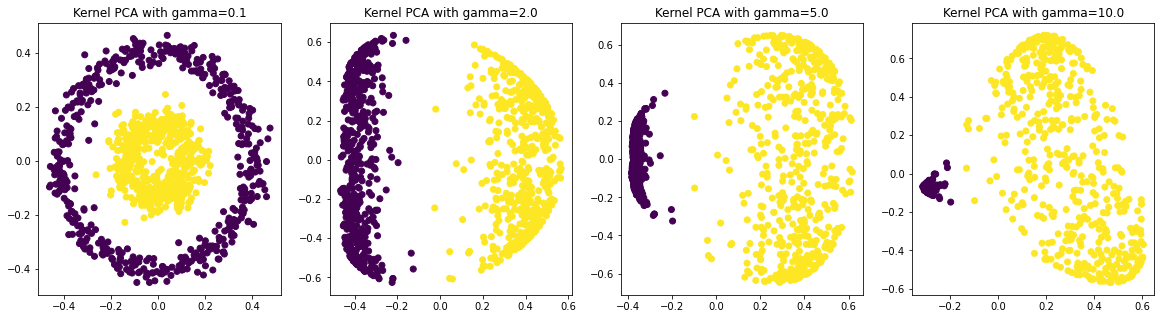

In [65]:
# perform kernel PCA with different gamma values
gammas = [0.1, 2, 5, 10]
fig, axes = plt.subplots(1, len(gammas), figsize=(20, 5))

for i, gamma in enumerate(gammas):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X)
    axes[i].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'Kernel PCA with gamma={gamma:.1f}')
    
plt.show()

In [66]:
# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# perform kernel PCA gamma = 2 (best)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=2)
X_kpca = kpca.fit_transform(X)

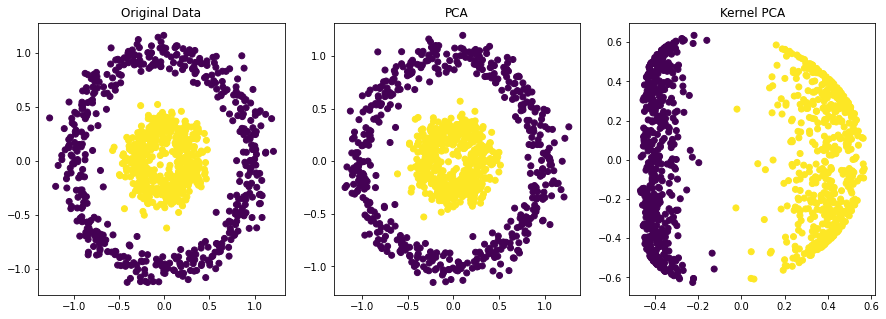

In [67]:
# plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_title('Original Data')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[1].set_title('PCA')

axes[2].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
axes[2].set_title('Kernel PCA')

plt.show()

In [71]:
# apply k-Means to PCA transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.predict(X_pca)

# apply k-Means to kernel PCA transformed data
kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)
y_kmeans_kpca = kmeans_kpca.predict(X_kpca)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


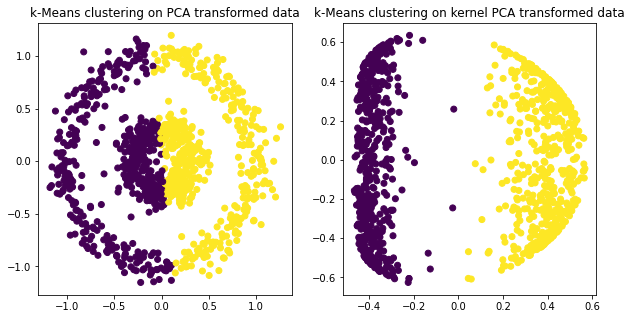

In [72]:
# plot results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot PCA transformed data
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis')
axes[0].set_title('k-Means clustering on PCA transformed data')

# plot kernel PCA transformed data
axes[1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kmeans_kpca, cmap='viridis')
axes[1].set_title('k-Means clustering on kernel PCA transformed data')

plt.show()